<span style="color:purple; font-size:20px;"> In this project, I am working with OilyGiant mining company to help them find the best place for a new well. The goal is to select which of the three regions is the best place to drill new oil wells. Ceollecting data that would show the oil well parameters in the selected region such as oil quality and volume of reserves. I will be building a model to predict the volume of reserves in the new wells, which will pick the oil wells with the highest estimated values and choosing the region with the highest total profit for the selected oil wells.

<span style="color:purple; font-size:20px;">We will be analyzing the potential profit and risks using the Bootstrapping technique. The Bootstrapping technique will simulate many possible outcomes. This will help us understand not only the expected profit, but also the risk of losing money. To conclude this project, we will select the region that meets the risk requirement and has the highest average profit.

In [1]:
# Import libraries and loading data

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Loading geological data from the three reqions

geo0 = pd.read_csv('/datasets/geo_data_0.csv')
geo1 = pd.read_csv('/datasets/geo_data_1.csv')
geo2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
# Showing a sample set of Region 0

geo0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
# Showing the details of a sample set from Region 0 

geo0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
# Showing a statistical summary of a sample set from Region 0

geo0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [6]:
# Showing a sample set of Region 1

geo1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [7]:
# Showing the details of a sample set from Region 1

geo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
# Showing a statistical summary of a sample set from Region 1

geo1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [9]:
# Showing a sample set of Region 2

geo2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [10]:
# Showing the details of a sample set from Region 2

geo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
# Showing a statistical summary of a sample set from Region 2

geo2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [12]:
# Data preparation

def prepare_data(data):
    features = data[['f0', 'f1', 'f2']]
    target = data['product']
    return features, target

In [13]:
# Training and validating model (per region)

def train_and_validate(data):
    X = data[['f0', 'f1', 'f2']]
    y = data['product']

    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=0.25, random_state=42
    )

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_valid)

    avg_predicted_reserves = predictions.mean()
    rmse = mean_squared_error(y_valid, predictions, squared=False)

    return predictions, y_valid, avg_predicted_reserves, rmse

<span style="color:purple; font-size:17px;"> --> This is splitting the data into 75% train and 25% validation. This is also training linear regression, predicting reserves and help calculate the RMSE to measure accuracy.

In [14]:
# Train a model for each region and comparing prediction errors

pred0, y0, avg0, rmse0 = train_and_validate(geo0)
pred1, y1, avg1, rmse1 = train_and_validate(geo1)
pred2, y2, avg2, rmse2 = train_and_validate(geo2)

print(f"Region 0: Average predicted reserves = {avg0:.2f}, RMSE = {rmse0:.2f}")
print(f"Region 1: Average predicted reserves = {avg1:.2f}, RMSE = {rmse1:.2f}")
print(f"Region 2: Average predicted reserves = {avg2:.2f}, RMSE = {rmse2:.2f}")

Region 0: Average predicted reserves = 92.40, RMSE = 37.76
Region 1: Average predicted reserves = 68.71, RMSE = 0.89
Region 2: Average predicted reserves = 94.77, RMSE = 40.15


In [15]:
# Constants needed for profit calculation

BUDGET = 100_000_000
REVENUE_PER_UNIT = 4500
WELLS_TO_SELECT = 200

In [16]:
# Average reserves per region

avg_actual_0 = geo0['product'].mean()
avg_actual_1 = geo1['product'].mean()
avg_actual_2 = geo2['product'].mean()

print(f"Region 0 average reserves: {avg_actual_0:.2f}")
print(f"Region 1 average reserves: {avg_actual_1:.2f}")
print(f"Region 2 average reserves: {avg_actual_2:.2f}")

Region 0 average reserves: 92.50
Region 1 average reserves: 68.83
Region 2 average reserves: 95.00


In [17]:
# Break-even reserve level

break_even_volume = BUDGET / REVENUE_PER_UNIT / WELLS_TO_SELECT
print(f"Break-even reserves per well: {break_even_volume:.2f}")

Break-even reserves per well: 111.11



<div class="alert alert-info"> <b>Student comments:</b>


We can see above the results of average volume or predicted reserves for each region, 92.50, 68.83 and 95.00, consecutively. Comparing it to the break-even reserve value, Region 0 and 2 are almost close to the threshold. This indicates moderate profitable potential; whilst, Region 1 shows a 68.83 average reserve which more likely generate sufficient revenue per well.

In [18]:
# Comparison table

comparison_df = pd.DataFrame({
    'Region': [0, 1, 2],
    'Average Actual Reserves': [avg_actual_0, avg_actual_1, avg_actual_2],
    'Break-even Reserves': [break_even_volume]*3
})

comparison_df

,Region,Average Actual Reserves,Break-even Reserves
0,0,92.500,111.111111
1,1,68.825,111.111111
2,2,95.000,111.111111


<div class="alert alert-info"> <b>Student comments:</b> 

Comparing the values of each region with the break-even threshold, we can see from the table above that Region 0 and 2 are almost near the threshold and Region 1 is showing lower value which would suggest a stronger baseline profitability.

In [19]:
# Selecting top wells and summarizing target reserves

WELLS_TO_SELECT = 200

def summarize_top_wells(predictions, targets):
    # Convert predictions to Series if needed
    predictions = pd.Series(predictions, index=targets.index)
    
    # Pick top wells by predicted reserves
    top_preds = predictions.sort_values(ascending=False).head(WELLS_TO_SELECT)
    
    # Get actual reserves for those wells
    actual_reserves = targets.loc[top_preds.index]
    
    # Summarize total and average reserves
    total_reserves = actual_reserves.sum()
    avg_reserves = actual_reserves.mean()
    
    return total_reserves, avg_reserves

<div class="alert alert-info"> <b>Student comments:</b>

This is using the model's prediction to rank wells, selecting the top 200 wells, calculating the actual total reserves of those wells and comparing regions before adding uncertainty.

In [20]:
# Applying to each region

total_0, avg_0 = summarize_top_wells(pred0, y0)
total_1, avg_1 = summarize_top_wells(pred1, y1)
total_2, avg_2 = summarize_top_wells(pred2, y2)

print(f"Region 0: Total reserves = {total_0:.2f}, Average per well = {avg_0:.2f}")
print(f"Region 1: Total reserves = {total_1:.2f}, Average per well = {avg_1:.2f}")
print(f"Region 2: Total reserves = {total_2:.2f}, Average per well = {avg_2:.2f}")

Region 0: Total reserves = 29686.98, Average per well = 148.43
Region 1: Total reserves = 27589.08, Average per well = 137.95
Region 2: Total reserves = 27996.83, Average per well = 139.98


In [21]:
# Clean comparison table

top_wells_df = pd.DataFrame({
    'Region': [0, 1, 2],
    'Total Reserves (Top 200 Wells)': [total_0, total_1, total_2],
    'Average Reserves per Well': [avg_0, avg_1, avg_2]
})

top_wells_df

,Region,Total Reserves (Top 200 Wells),Average Reserves per Well
0,0,29686.980254,148.434901
1,1,27589.081548,137.945408
2,2,27996.826132,139.984131


<div class="alert alert-info"> <b>Student comments:</b>

We used the model’s predictions to pick the 200 wells that looked the most promising in each region. After choosing those wells, we checked how much oil they actually have and added it up.

Region 0 had the highest total amount of oil and the best average per well, which means it looks like the most profitable option when we choose wells based on the model’s predictions. Regions 1 and 2 had less oil overall, so they seem less profitable by comparison.

This gives us a basic estimate of how much oil we can expect before considering uncertainty. Next, we use bootstrapping to see how these results might change and to understand the risk of losing money.

In [22]:
def calculate_profit(predictions, targets):
    WELLS_TO_SELECT = 200
    BUDGET = 100_000_000
    REVENUE_PER_UNIT = 4500

    # Select top wells based on predictions
    top_wells = predictions.sort_values(ascending=False).head(WELLS_TO_SELECT)

    # Get actual reserves for selected wells
    selected_targets = targets.loc[top_wells.index]

    # Calculate revenue and profit
    revenue = selected_targets.sum() * REVENUE_PER_UNIT
    profit = revenue - BUDGET

    return profit

In [23]:
# Bootstrapping technique

import numpy as np

def bootstrap_profit(predictions, targets, n_samples=1000):
    profits = []
    for _ in range(n_samples):
        sample_preds = predictions.sample(n=500, replace=True)
        profit = calculate_profit(sample_preds, targets.loc[sample_preds.index])
        profits.append(profit)
    profits = np.array(profits)
    avg_profit = profits.mean()
    lower_ci = np.percentile(profits, 2.5)
    upper_ci = np.percentile(profits, 97.5)
    loss_risk = (profits < 0).mean() * 100
    return avg_profit, lower_ci, upper_ci, loss_risk, profits

<span style="color:purple; font-size:17px;"> --> This technique simulates 1000 different profit outcomes by resampling 500 wells with replacement. This estimates average profit, 95% confidence interval and risk of loss for each region.

In [24]:
# Applying bootstrapping to each region

results = []
all_profits = []

for preds, targets in [(pd.Series(pred0), y0.reset_index(drop=True)), 
                       (pd.Series(pred1), y1.reset_index(drop=True)), 
                       (pd.Series(pred2), y2.reset_index(drop=True))]:
    avg, low, high, risk, profits = bootstrap_profit(preds, targets)
    results.append([avg, low, high, risk])
    all_profits.append(profits)

results_df = pd.DataFrame(results, columns=['Average Profit', 'Lower CI', 'Upper CI', 'Loss Risk (%)'])
results_df['Region'] = [0, 1, 2]
results_df

,Average Profit,Lower CI,Upper CI,Loss Risk (%),Region
0,6.044584e+06,-8.086237e+04,1.206662e+07,2.8,0
1,6.630277e+06,1.593475e+06,1.218293e+07,0.5,1
2,5.774465e+06,9.814329e+02,1.191408e+07,2.5,2


<span style="color:purple; font-size:17px;"> --> After applying the bootstrapping technique to each region we can see on this table that the highest profit would be from Region 1 with a 6,429,040 (USD Millions) and the lowest risk to dig new wells is Region 1 well having 0.3% loss risk which will be less than the 2.5% condition that was given.

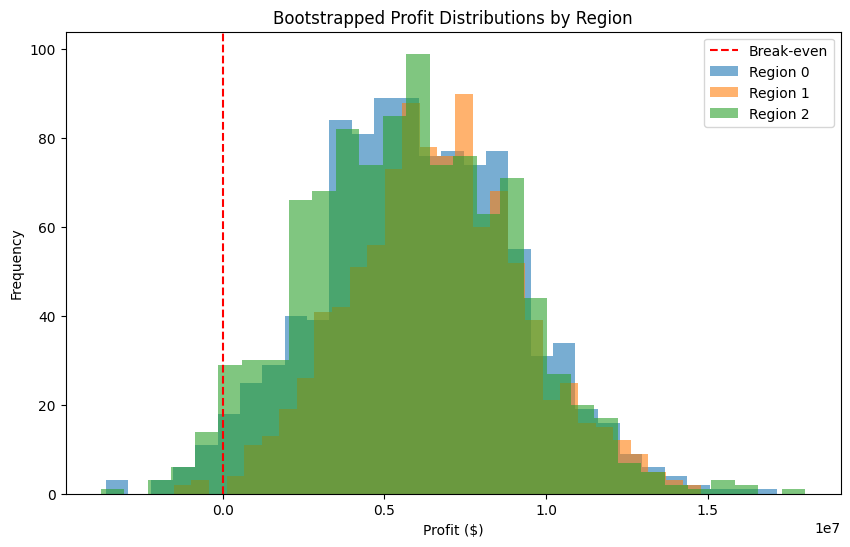

In [25]:
# Plot Profit Distributions

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for i, profits in enumerate(all_profits):
    plt.hist(profits, bins=30, alpha=0.6, label=f'Region {i}')

plt.axvline(0, color='red', linestyle='--', label='Break-even')
plt.xlabel('Profit ($)')
plt.ylabel('Frequency')
plt.title('Bootstrapped Profit Distributions by Region')
plt.legend()
plt.show()

<span style="color:purple; font-size:17px;"> --> This histogram shows the range of possible profits for each region. The vertical red mark dotted lines indicate the break even point which indicates the risk of loss.

<span style="color:purple; font-size:17px;"> Another way we can look at this histogram is the more it leans towards the right side of the break even point the safer and more profitable it is; whilst if there are more regions spreading out or leaning to the left it means their would be a larger risk loss.

<span style="color:purple; font-size:17px;"> As we can see on the chart, there is a lot of Region 0 and Region 2 that is leaning towards the left side of the break even point. And this tells us the most we can trust and  should be digging is from Region 1.

<span style="color:purple; font-size:20px;"> Final Decision

<span style="color:purple; font-size:17px;">Decision Rules:

<span style="color:purple; font-size:15px;"> - Risk of loss must be below 2.5%

<span style="color:purple; font-size:15px;"> - Choose region with the highest average profit

In [26]:
# Keep only regions with risk < 2.5%
safe_regions = results_df[results_df['Loss Risk (%)'] < 2.5]

# Pick region with highest average profit
best_region = safe_regions.loc[safe_regions['Average Profit'].idxmax()]
best_region

Average Profit    6.630277e+06
Lower CI          1.593475e+06
Upper CI          1.218293e+07
Loss Risk (%)     5.000000e-01
Region            1.000000e+00
Name: 1, dtype: float64

<span style="color:purple; font-size:20px;"> CONCLUSION:

<span style="color:purple; font-size:17px;"> The best region to dig new wells is Region 1, as it has provided the best balance of high expected profit and low risk. From training the model we already can see that Region 1 has given the lowest RMSE of 0.890 against Region 0's 37.757 and Region 2's 40.146 score. After we have trained the model and used the bootstrapping technique we were able to calculate that the average profit of digging new wells on Region 1 is the highest with 6,429,040 (USD) and a risk loss of 0.3% which is significantly lower than the 2.5% condition.